In [110]:
#importing libraries and packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
#data import
data = pd.read_csv('E:\SP Jain\python files_boot camp project\DataCosuppychain dataset\DataCoSupplyChainDataset.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,02-03-2018,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,18-01-2018,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,17-01-2018,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,16-01-2018,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,15-01-2018,Standard Class


In [112]:
# Exploratory data analysis
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))
data_info(data)

1) Number of columns are :  47
2) Number of rows are :  180519
3) Total number of data-points : 8484393
4) Count of Numerical Features : 26
5) Count of Categorical Features : 21


In [113]:
# missing value identification
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')
            
features_with_missing_values(data)

Percentage of Total Missing Values is  0.0 %
Missing Value Estimation :
The Feature  Customer Lname  has 8 missing values
The Feature  Customer Zipcode  has 3 missing values


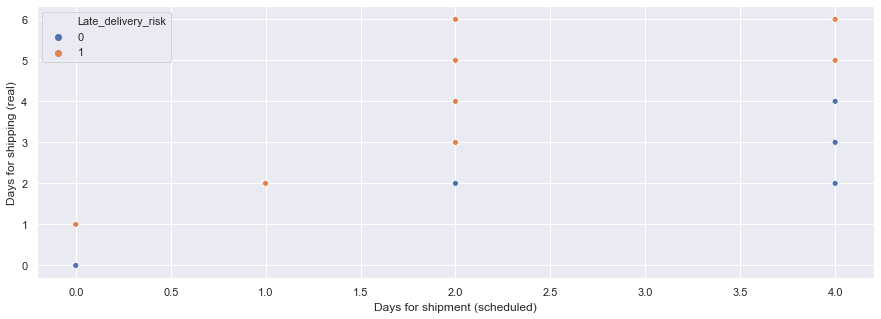

In [114]:
# Target value analysis
sns.set()
sns.scatterplot(x="Days for shipment (scheduled)",y="Days for shipping (real)",hue="Late_delivery_risk",data=data)

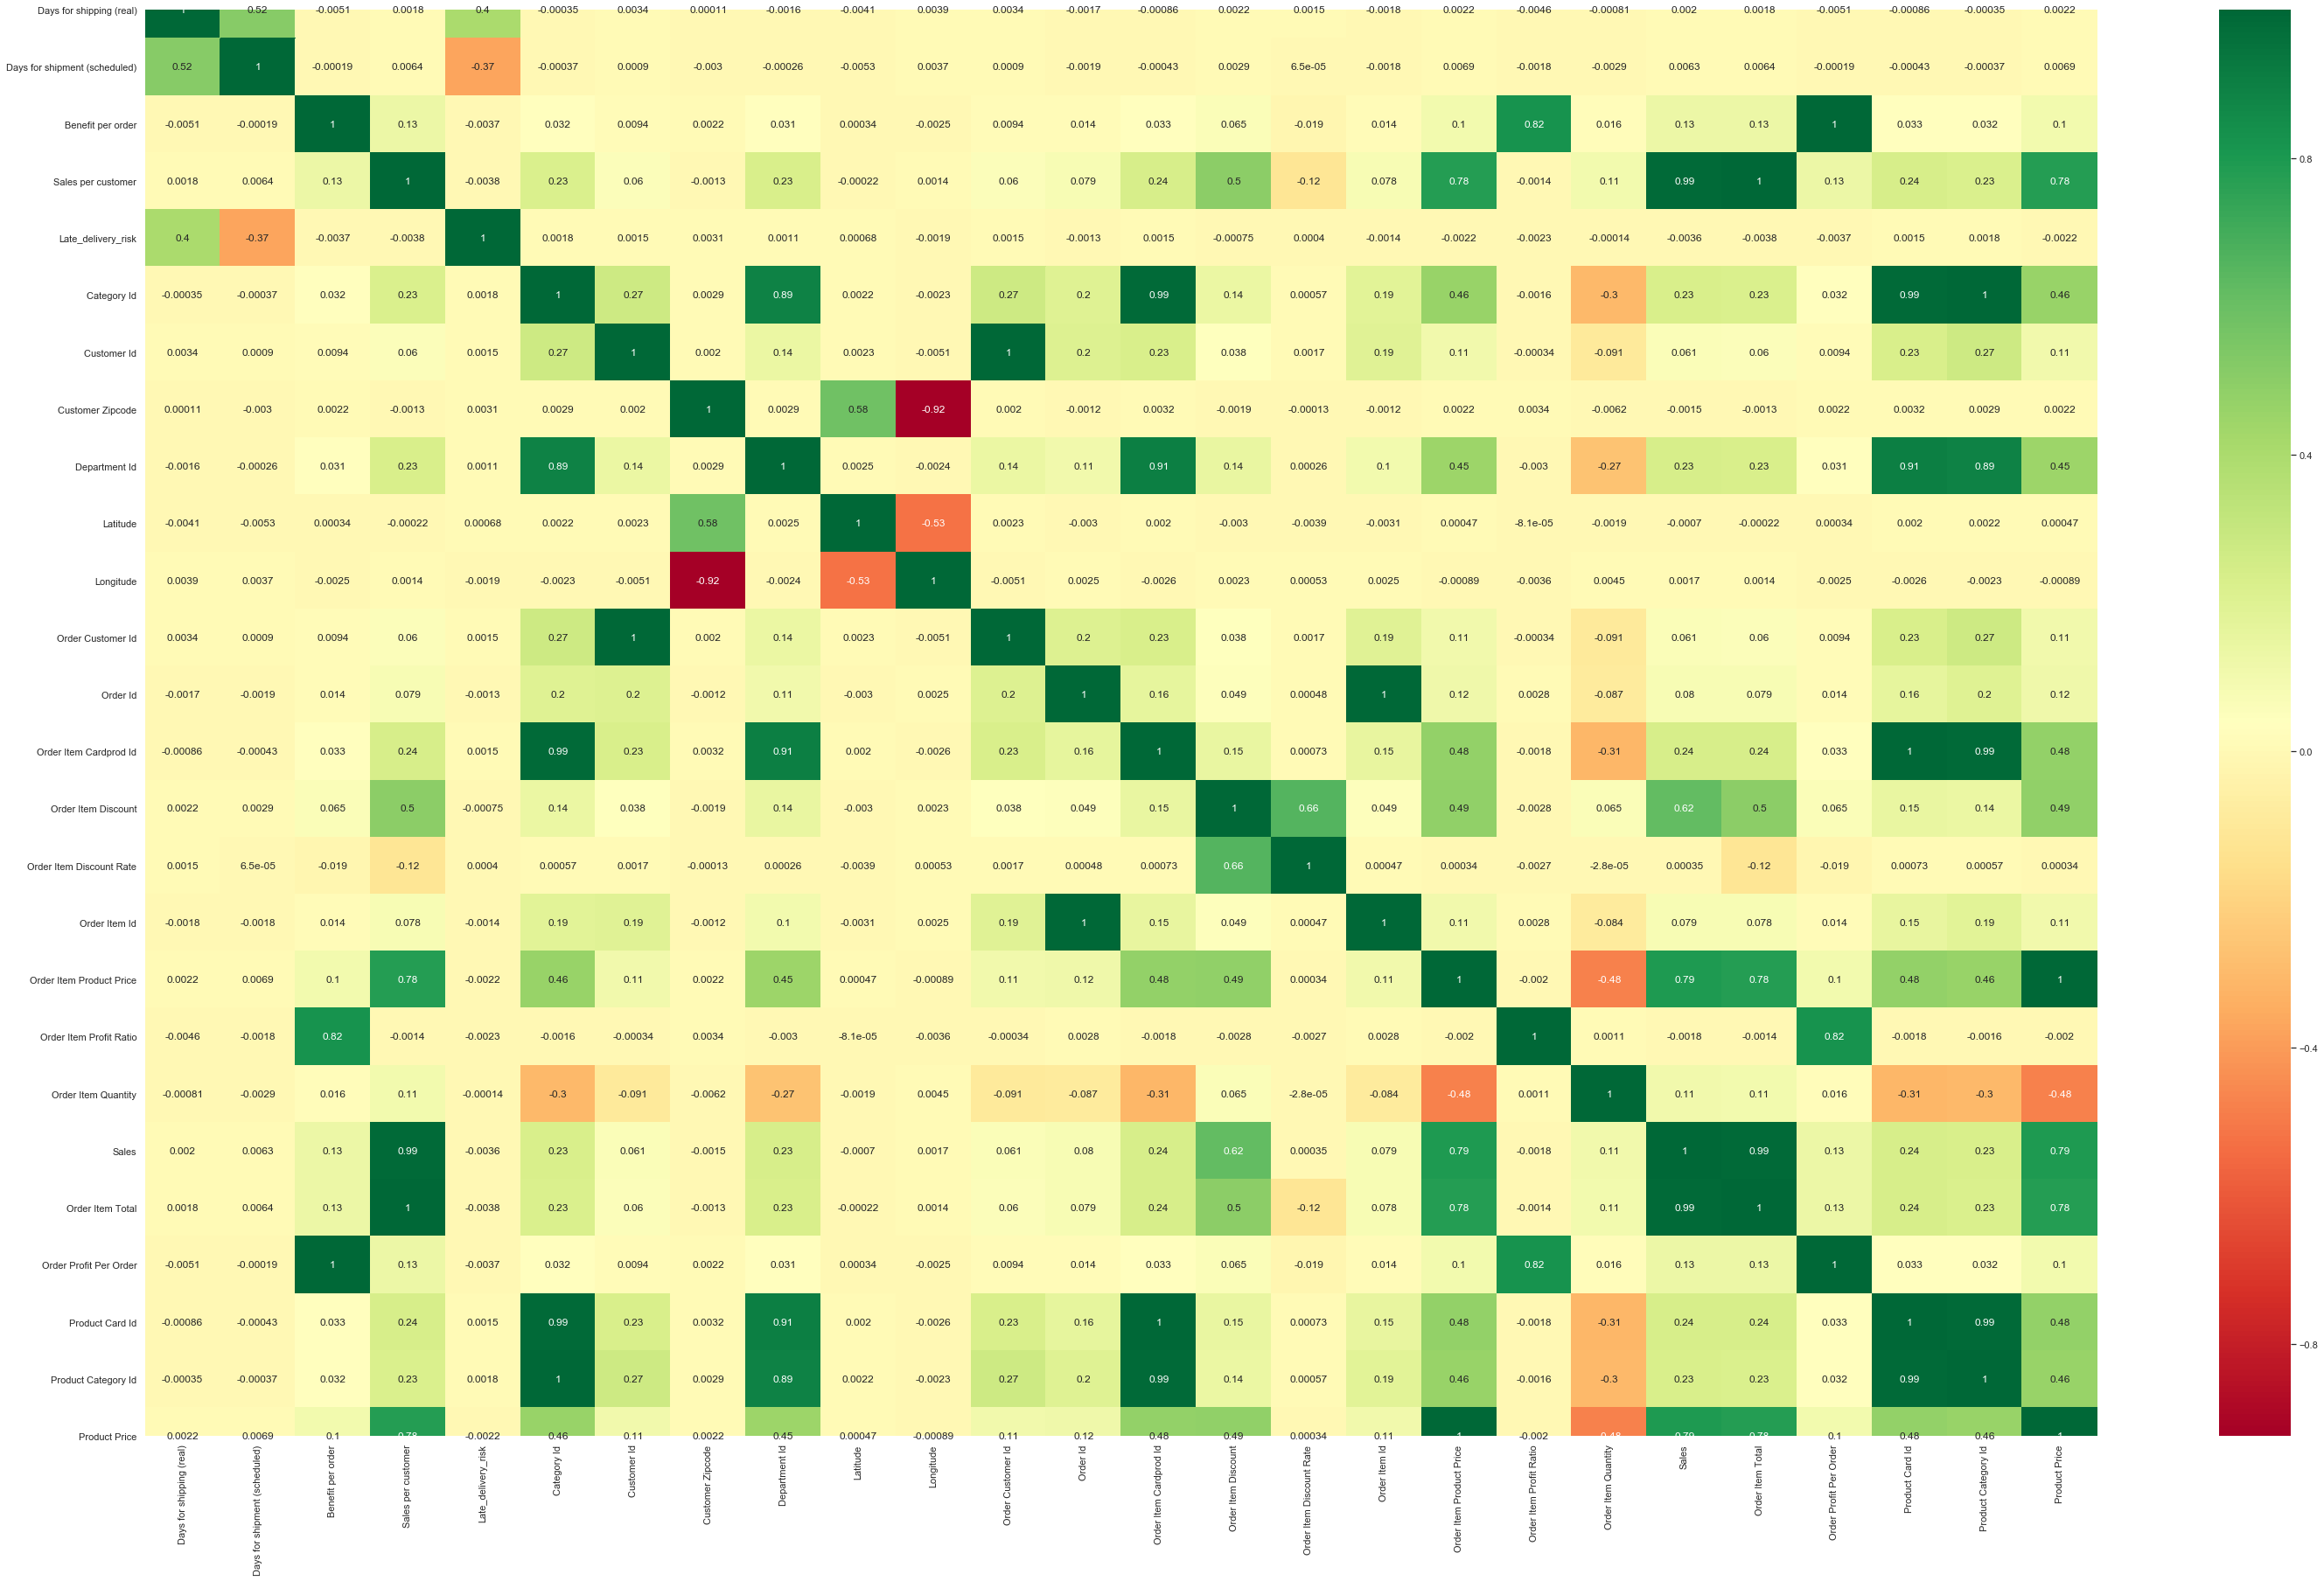

In [115]:
corrmap = data.corr()
top=corrmap.index
plt.figure(figsize=(50,30))
g=sns.heatmap(data[top].corr(),annot=True,cmap="RdYlGn")

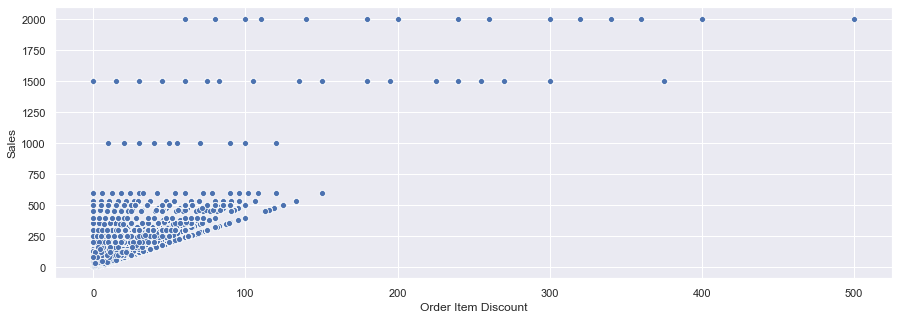

In [116]:
sns.set()
sns.scatterplot(x="Order Item Discount",y="Sales",data=data)

In [117]:
#Insights from Heatmap:
#Columns that are similar with same values but with different metadata (duplicate columns)

 #[Benefit per order], Order Profit per order
 #[Sales per customer], Sales, Order Item Total
 #[Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,
 #[Order Item Product Price],Product Price
 #Unwanted features(null or less correlated values)

    #Product Description
    #Product Status

In [118]:
# splitting data set
shipment_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)'
                     ,'Shipping Mode','Order Status','Order Region','Category Name'
                     ,'Market','Delivery Status']
shipment = data[shipment_features]
shipment.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Status,Order Region,Category Name,Market,Delivery Status
0,DEBIT,3,4,Standard Class,COMPLETE,Southeast Asia,Sporting Goods,Pacific Asia,Advance shipping
1,TRANSFER,5,4,Standard Class,PENDING,South Asia,Sporting Goods,Pacific Asia,Late delivery
2,CASH,4,4,Standard Class,CLOSED,South Asia,Sporting Goods,Pacific Asia,Shipping on time
3,DEBIT,3,4,Standard Class,COMPLETE,Oceania,Sporting Goods,Pacific Asia,Advance shipping
4,PAYMENT,2,4,Standard Class,PENDING_PAYMENT,Oceania,Sporting Goods,Pacific Asia,Advance shipping


In [119]:
shipment.shape

(180519, 9)

In [120]:
finance_features=['Benefit per order','Sales per customer','Order Item Discount','Order Item Discount Rate',
                  'Order Item Product Price','Order Item Profit Ratio']
finance = data[finance_features]
finance.head()

,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,22.860001,304.809998,22.940001,0.07,327.75,0.08
4,134.210007,298.250000,29.500000,0.09,327.75,0.45


In [121]:
#Converting categorical features that represent date and time to datetime datatype.
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

In [129]:
# Handling Time and date variables
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day

In [130]:
new_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Category Name'
                        ,'Order Status','Order Region','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']
len(new_dataset_features)

14

In [131]:
new_data = data[new_dataset_features]
model_data = new_data
new_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Name,Order Status,Order Region,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,Sporting Goods,COMPLETE,Southeast Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,Sporting Goods,PENDING,South Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,Sporting Goods,CLOSED,South Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,Sporting Goods,COMPLETE,Oceania,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,Sporting Goods,PENDING_PAYMENT,Oceania,Advance shipping,13,1,2018,15,1,2018


In [132]:
#One-Hot encoding categotical variables in the data
model_data = pd.get_dummies(model_data)
model_data.shape

(180519, 99)

In [133]:
model_data.head() # why the number of columns increased?

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Category Name_Accessories,Category Name_As Seen on TV!,Category Name_Baby,Category Name_Baseball & Softball,Category Name_Basketball,Category Name_Books,Category Name_Boxing & MMA,Category Name_CDs,Category Name_Cameras,Category Name_Camping & Hiking,Category Name_Cardio Equipment,Category Name_Children's Clothing,Category Name_Cleats,Category Name_Computers,Category Name_Consumer Electronics,Category Name_Crafts,Category Name_DVDs,Category Name_Electronics,Category Name_Fishing,Category Name_Fitness Accessories,Category Name_Garden,Category Name_Girls' Apparel,Category Name_Golf Apparel,Category Name_Golf Bags & Carts,Category Name_Golf Balls,Category Name_Golf Gloves,Category Name_Golf Shoes,Category Name_Health and Beauty,Category Name_Hockey,Category Name_Hunting & Shooting,Category Name_Indoor/Outdoor Games,Category Name_Kids' Golf Clubs,Category Name_Lacrosse,Category Name_Men's Clothing,Category Name_Men's Footwear,Category Name_Men's Golf Clubs,Category Name_Music,Category Name_Pet Supplies,Category Name_Shop By Sport,Category Name_Soccer,Category Name_Sporting Goods,Category Name_Strength Training,Category Name_Tennis & Racquet,Category Name_Toys,Category Name_Trade-In,Category Name_Video Games,Category Name_Water Sports,Category Name_Women's Apparel,Category Name_Women's Clothing,Category Name_Women's Golf Clubs,Order Status_CANCELED,Order Status_CLOSED,Order Status_COMPLETE,Order Status_ON_HOLD,Order Status_PAYMENT_REVIEW,Order Status_PENDING,Order Status_PENDING_PAYMENT,Order Status_PROCESSING,Order Status_SUSPECTED_FRAUD,Order Region_Canada,Order Region_Caribbean,Order Region_Central Africa,Order Region_Central America,Order Region_Central Asia,Order Region_East Africa,Order Region_East of USA,Order Region_Eastern Asia,Order Region_Eastern Europe,Order Region_North Africa,Order Region_Northern Europe,Order Region_Oceania,Order Region_South America,Order Region_South Asia,Order Region_South of USA,Order Region_Southeast Asia,Order Region_Southern Africa,Order Region_Southern Europe,Order Region_US Center,Order Region_West Africa,Order Region_West Asia,Order Region_West of USA,Order Region_Western Europe,Delivery Status_Advance shipping,Delivery Status_Late delivery,Delivery Status_Shipping canceled,Delivery Status_Shipping on time
0,3,4,0,31,1,2018,3,2,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,5,4,1,13,1,2018,18,1,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,4,0,13,1,2018,17,1,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,4,0,13,1,2018,16,1,2018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,4,0,13,1,2018,15,1,2018,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [134]:
# Model building
x = model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = model_data[['Days for shipping (real)','Days for shipment (scheduled)']]
x.shape,y.shape

((180519, 97), (180519, 2))

In [135]:
# train-test_split
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.20)

In [136]:
#sc=StandardScaler() 
#No standard Scaling is not required for Decision Trees are tree-based algorithms and do not need normalization or standard scaling
#pc=PCA()
# The hyper-parameters used are default hyper-parameters
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [137]:
#Function for estimating r2_score, mean_squared_error, mean_absolute_error
def metrics(y_test,pred):
    a =r2_score(y_test,pred)
    b =mean_squared_error(y_test,pred)
    c =mean_absolute_error(y_test,pred)
    print('The r-squared score of the model is ',a)
    print('The mean squared error is',b)
    print('The mean accuracy score is',c)
metrics(y_test,pred)
#from sklearn.model_selection import cross_validate
#cv_results = cross_validate(clf,x,y,cv=4)
#cv_results {NO sufficient RAM space in Kaggle Kernel to run the CROSS-VALIDATION TESTS}

The r-squared score of the model is  0.9413222861303044
The mean squared error is 0.11150182266661729
The mean accuracy score is 0.05814845077184431


In [138]:
#Converting the predicted output array to dataframe
Prediction = pd.DataFrame(pred)
prediction = Prediction.rename(columns={0:'Fastest_shipment',1:'Avg_shipment'})
prediction.head()


,Fastest_shipment,Avg_shipment
0,2.0,4.0
1,4.0,4.0
2,5.0,4.0
3,2.0,4.0
4,6.0,4.0


In [139]:
# Statiscal modelling
prediction['risk'] = np.where(prediction['Avg_shipment'] >= prediction['Fastest_shipment'],0,1)

In [140]:
prediction.head()

,Fastest_shipment,Avg_shipment,risk
0,2.0,4.0,0
1,4.0,4.0,0
2,5.0,4.0,1
3,2.0,4.0,0
4,6.0,4.0,1


In [141]:
l = prediction['risk']
m = x_test['Late_delivery_risk']
l.shape,m.shape

((36104,), (36104,))

In [142]:
# Defining a function to evaluate our statiscal model for Late_delivery_risk_prediction
def evaluation_risk_factor(l,m):
  print('1) The accuracy of the risk predictor model is :',accuracy_score(l,m))
  print('2) The AUROC score is :',roc_auc_score(l,m))
  print('3) Some of the key classification metrics are :')
  print(classification_report(l,m))
  ax=plt.subplot()
  sns.heatmap(confusion_matrix(l,m),annot=True,ax=ax);
  ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels')
  ax.set_title('Confusion matrix for Risk Delivery classfication');

1) The accuracy of the risk predictor model is : 0.975736760469754
2) The AUROC score is : 0.9788426239010724
3) Some of the key classification metrics are :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15402
           1       1.00      0.96      0.98     20702

    accuracy                           0.98     36104
   macro avg       0.97      0.98      0.98     36104
weighted avg       0.98      0.98      0.98     36104



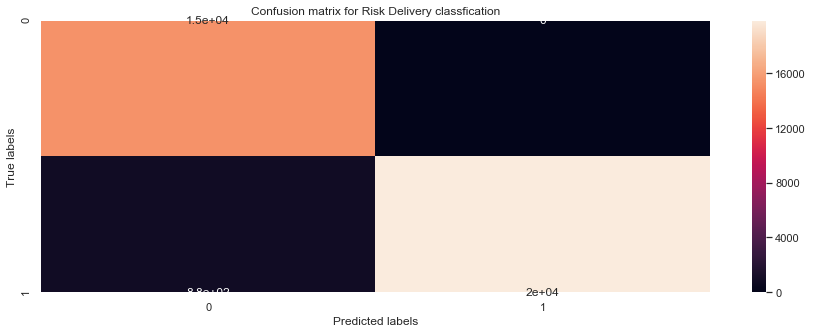

In [143]:
evaluation_risk_factor(l,m)

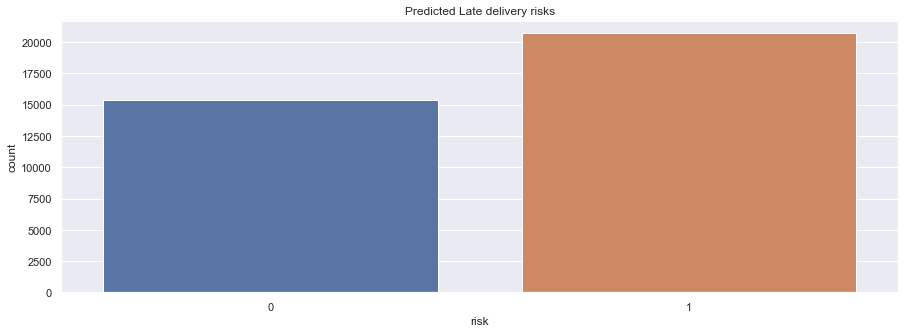

In [146]:
sns.set(style="darkgrid")
ax=sns.countplot(x="risk",data=prediction).set_title('Predicted Late delivery risks')

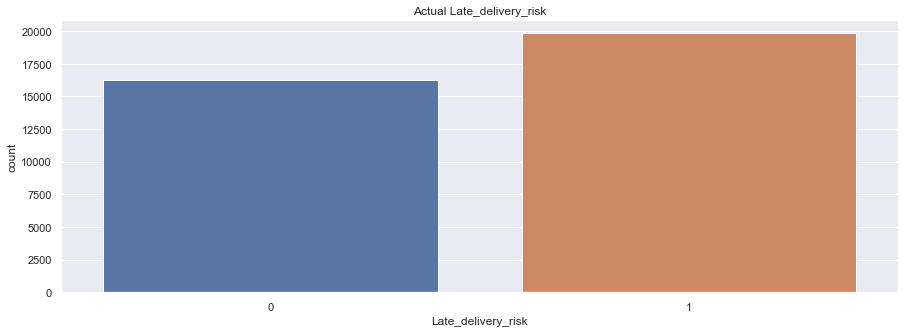

In [147]:
bx=sns.countplot(x='Late_delivery_risk',data=x_test).set_title('Actual Late_delivery_risk')

In [148]:
filename = 'Shipping_duration_estimator.pkl'
pickle.dump(model,open(filename,'wb'))

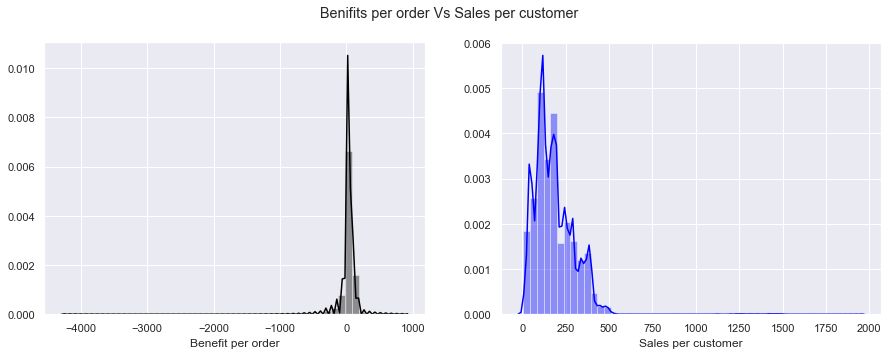

In [149]:
#let's check the pattern of 'transportation in km' vs 'distance between origin and destination'
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
sns.distplot(data['Benefit per order'], color='black')

plt.subplot(122)
sns.distplot(data['Sales per customer'], color='blue')

plt.suptitle('Benifits per order Vs Sales per customer')
plt.show()

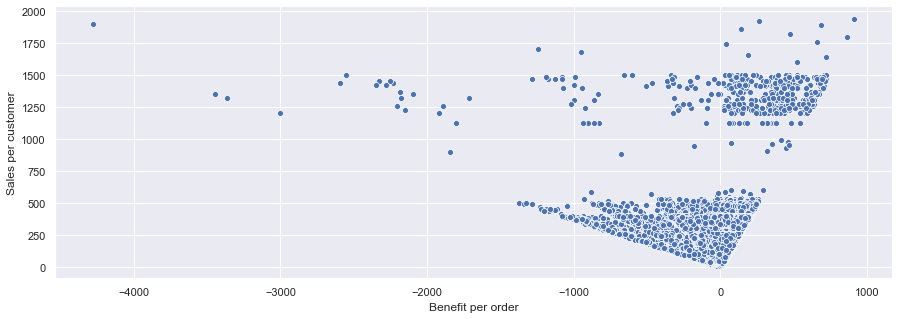

In [150]:
sns.set()
sns.scatterplot(x="Benefit per order",y="Sales per customer",data=data)

In [151]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,order_date,shipping_date,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,02-03-2018,Standard Class,2018-01-31 22:56:00,2018-02-03,2018,1,31,2018,2,3
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,18-01-2018,Standard Class,2018-01-13 12:27:00,2018-01-18,2018,1,13,2018,1,18
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,17-01-2018,Standard Class,2018-01-13 12:06:00,2018-01-17,2018,1,13,2018,1,17
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,16-01-2018,Standard Class,2018-01-13 11:45:00,2018-01-16,2018,1,13,2018,1,16
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,15-01-2018,Standard Class,2018-01-13 11:24:00,2018-01-15,2018,1,13,2018,1,15


In [152]:
del_sta = ['Sales per customer','Benefit per order']

In [153]:
del_status = data[del_sta]
del_status.head()

,Sales per customer,Benefit per order
0,314.640015,91.250000
1,311.359985,-249.089996
2,309.720001,-247.779999
3,304.809998,22.860001
4,298.250000,134.210007


In [154]:
from matplotlib import pyplot

Feature: 0, Score: 0.15151
Feature: 1, Score: 0.34488
Feature: 2, Score: 0.00797
Feature: 3, Score: 0.00270
Feature: 4, Score: 0.40037
Feature: 5, Score: 0.00902
Feature: 6, Score: 0.00298
Feature: 7, Score: 0.00096
Feature: 8, Score: 0.00140
Feature: 9, Score: 0.00131
Feature: 10, Score: 0.00128
Feature: 11, Score: 0.00013
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00004
Feature: 14, Score: 0.00008
Feature: 15, Score: 0.00001
Feature: 16, Score: 0.00007
Feature: 17, Score: 0.00005
Feature: 18, Score: 0.00003
Feature: 19, Score: 0.00015
Feature: 20, Score: 0.00068
Feature: 21, Score: 0.00070
Feature: 22, Score: 0.00011
Feature: 23, Score: 0.00107
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.00003
Feature: 27, Score: 0.00002
Feature: 28, Score: 0.00020
Feature: 29, Score: 0.00088
Feature: 30, Score: 0.00002
Feature: 31, Score: 0.00005
Feature: 32, Score: 0.00017
Feature: 33, Score: 0.00006
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00014
Fe

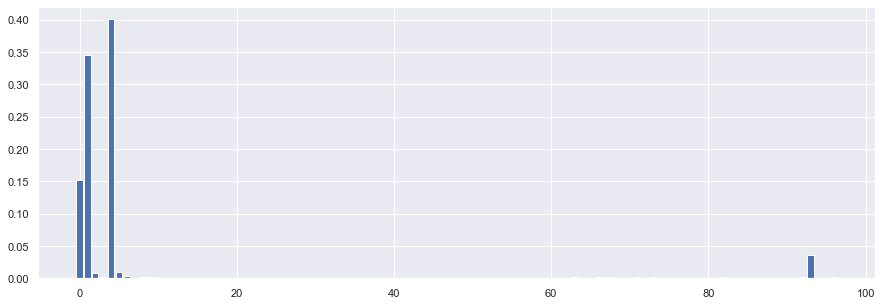

In [155]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [156]:
print(prediction)

       Fastest_shipment  Avg_shipment  risk
0                   2.0           4.0     0
1                   4.0           4.0     0
2                   5.0           4.0     1
3                   2.0           4.0     0
4                   6.0           4.0     1
...                 ...           ...   ...
36099               3.0           2.0     1
36100               3.0           2.0     1
36101               4.0           2.0     1
36102               5.0           4.0     1
36103               2.0           1.0     1

[36104 rows x 3 columns]


In [157]:
x_test.shape

(36104, 97)

In [158]:
import csv 
prediction.to_csv('abc.csv')

In [159]:
x_test.to_csv('bcd.csv')